<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4/blob/main/Hall/Hall_measurements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab4 Hall effect measurements: Parts 2 and 5


Evgeny Kolonsky 2025

v.0.1.3


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.interpolate import interp1d

In [2]:
# Constants
d = 1e-3 # thikness, m
L = 16e-3 # length between ohmic contacts, m
W = 10e-3 # width, m

# Part 2: $U_h(B)$

$$
R_H = \frac{U_H d}{I B} = \frac{1}{n q}
$$

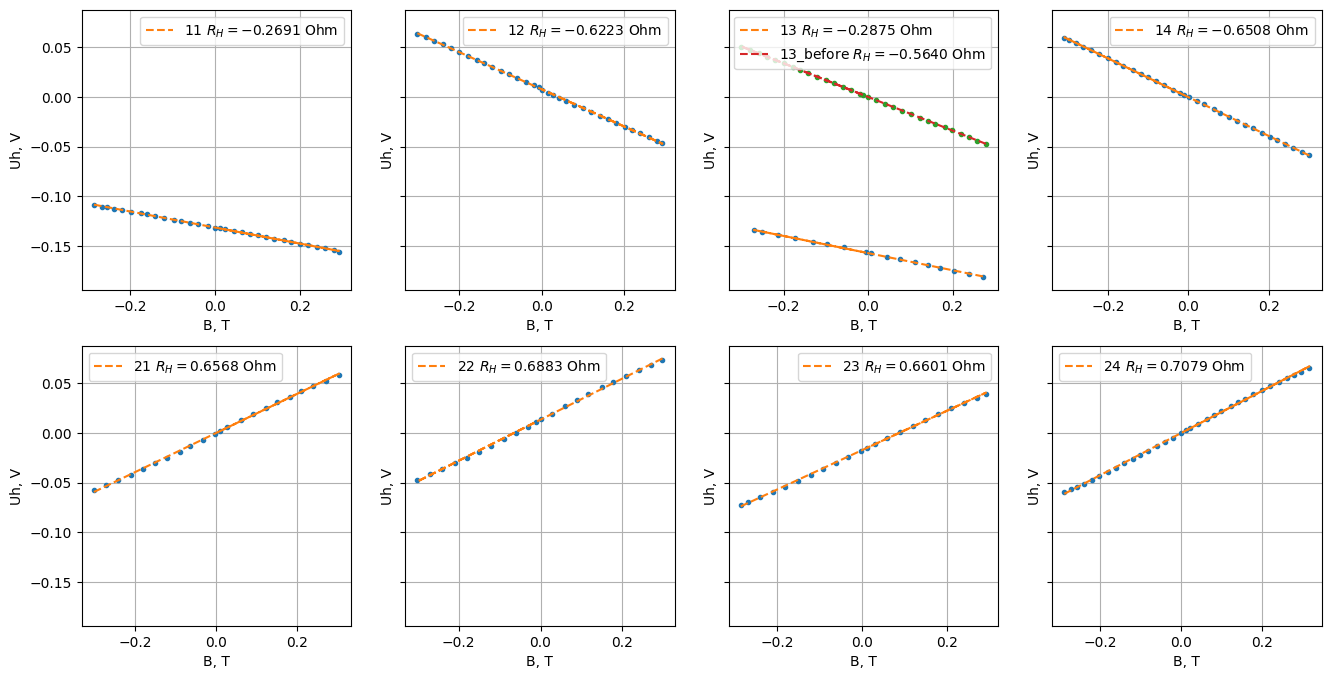

In [23]:
names = ['11', '12', '13', '13_before', '14', '21', '22', '23', '24']

fig, ax = plt.subplots(2, 4, figsize=(16, 8), sharey=True)

for name in names:
  url = f'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab4_Hall/part2/{name}.txt'
  response = requests.get(url)
  B, Uh = np.genfromtxt(response.text.splitlines()).T
  B  *=1e-3 # mT -> T
  Uh *=1e-3 # mV -> V
  first_digit  = int(name[:2]) % 10
  second_digit = int(name[:2]) // 10
  axx = ax[second_digit-1, first_digit-1]
  axx.plot(B, Uh, '.')

  axx.set_xlabel('B, T')
  axx.set_ylabel('Uh, V')

  fit = linregress(B, Uh)
  RH = fit.slope * d / Ip
  axx.plot(B, fit.intercept + fit.slope *B, '--', label=rf'{name} $R_H ={RH*1e2:.4f}$ Ohm')
  axx.legend()
  if len(name) == 2:
    axx.grid()


# Part 5: Hall voltage as a function of temperature $U_h(T)$

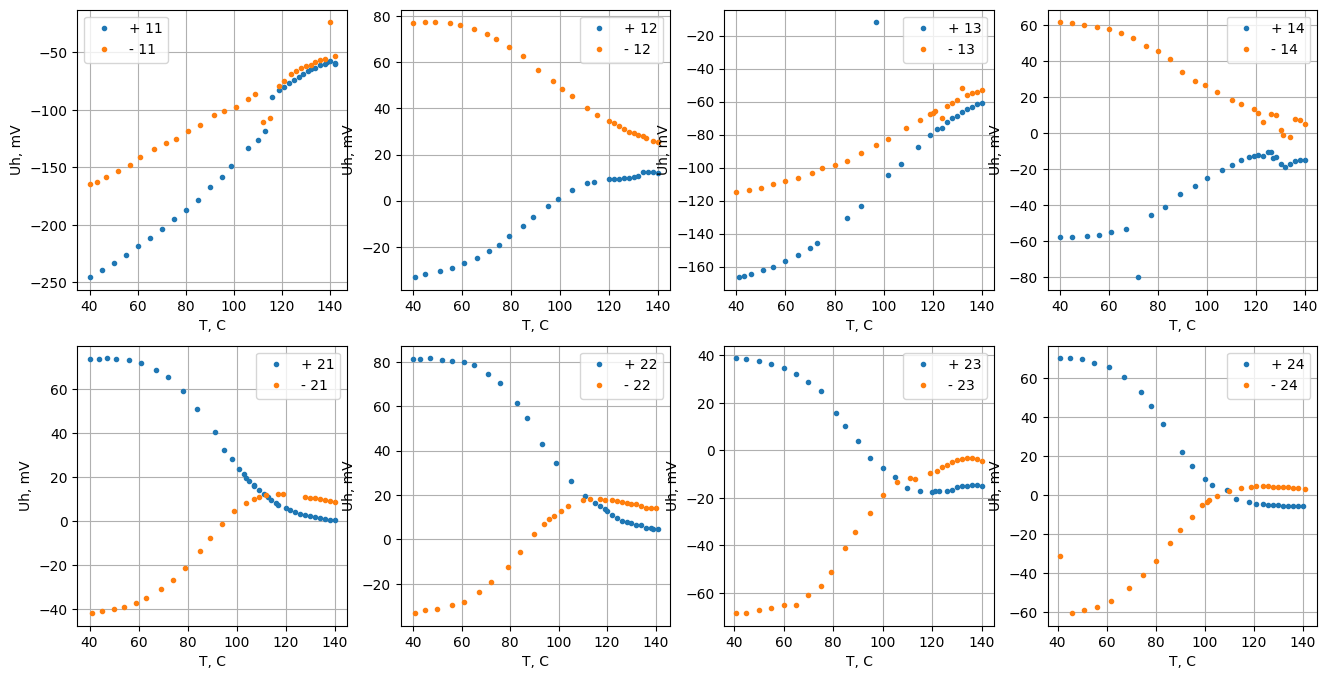

In [13]:
import requests

names = [11, 12, 13, 14, 21, 22, 23, 24]

fig, ax = plt.subplots(2, 4, figsize=(16, 8))

for name in names:
  url = f'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab4_Hall/{name}.txt'
  response = requests.get(url)
  T, Uh = np.loadtxt(response.text.splitlines()).T
  #T += 273.15 # K
  # find where polarity changed
  ix = np.argmin(np.diff(T) <=0) + 1
  # split
  T1 = T[:ix]
  T2 = T[ix:]
  Uh1 = Uh[:ix]
  Uh2 = Uh[ix:]

  #Tdense = np.linspace(T.min(), T.max(), 100)
  #f1 = interp1d(T1, Uh1, fill_value='extrapolate')
  #f2 = interp1d(T2, Uh2, fill_value='extrapolate')
  #dU = f2(Tdense) - f1(Tdense)
  #plt.plot(1/Tdense, np.log(dU/np.max(dU)))
  first_digit = name % 10
  second_digit = name // 10
  axx = ax[second_digit-1, first_digit-1]
  axx.plot(T1, Uh1, '.', label=f'+ {name}')
  axx.plot(T2, Uh2, '.', label=f'- {name}')

  axx.set_xlabel('T, C')
  axx.set_ylabel('Uh, mV')
  axx.legend()
  axx.grid()
